In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import chardet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
def extract_audio_features(filepath):
    y, sr = librosa.load(filepath, sr=None)

    # 전체 발화 시간
    duration = librosa.get_duration(y=y, sr=sr)

    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    onsets = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)
    # 초당 음절 수
    syllable_rate = len(onsets) / duration if duration > 0 else 0

    rms = librosa.feature.rms(y=y)[0]
    # 에너지의 떨림 정도
    rms_std = np.std(rms)

    zcr = librosa.feature.zero_crossing_rate(y)[0]
    # 끊기는 정도
    zcr_mean = np.mean(zcr)

    pitches, _ = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[pitches > 0]
    # 음높이 떨림 정도
    pitch_std = np.std(pitch_values) if len(pitch_values) > 0 else 0

    return {
        "duration": duration,
        "syllable_rate": syllable_rate,
        "rms_std": rms_std,
        "zcr_mean": zcr_mean,
        "pitch_std": pitch_std
    }

In [3]:
def build_dataset(label_csv_path, audio_dir, max_samples=None):
    import chardet

    # 인코딩 자동 감지
    encodings_to_try = ["utf-8", "cp949", "euc-kr", "latin1"]
    for enc in encodings_to_try:
        try:
            df = pd.read_csv(label_csv_path, encoding=enc)
            print(f"[INFO] 성공적으로 읽음: {label_csv_path} (encoding={enc})")
            break
        except Exception as e:
            print(f"[WARNING] 인코딩 실패: {enc} → {e}")
    else:
        raise ValueError(f"[ERROR] CSV 파일을 열 수 없습니다: {label_csv_path}")

    # 필수 컬럼 확인
    required_cols = ["filename", "voc_speed_sec_scr", "voc_quality_scr"]
    for col in required_cols:
        if col not in df.columns:
            raise KeyError(f"[ERROR] 누락된 컬럼: {col} in {label_csv_path}")

    df = df[required_cols]
    if max_samples:
        df = df.head(max_samples)

    features = []
    for i, (_, row) in enumerate(df.iterrows()):
        wav_name = row["filename"].split("_presentation")[0] + ".wav"
        wav_path = os.path.join(audio_dir, wav_name)

        if not os.path.exists(wav_path):
            print(f"[WARNING] 파일 없음: {wav_path}")
            continue

        print(f"[INFO] ({i+1}/{len(df)}) 처리 중: {wav_path}")
        feats = extract_audio_features(wav_path)
        feats["filename"] = wav_name
        feats["voc_speed_sec_scr"] = row["voc_speed_sec_scr"]
        feats["voc_quality_scr"] = row["voc_quality_scr"]
        features.append(feats)

    return pd.DataFrame(features)

In [4]:
df_20 = build_dataset("label/extract_train_label_20.csv", "audio/20대 train_audio")
df_30 = build_dataset("label/extract_train_label_30.csv", "audio/30대 train_audio")
df_50 = build_dataset("label/extract_train_label_50.csv", "audio/50대 train_audio")

[WARNING] 인코딩 실패: utf-8 → 'utf-8' codec can't decode byte 0xbf in position 0: invalid start byte
[INFO] 성공적으로 읽음: label/extract_train_label_20.csv (encoding=cp949)
[INFO] (1/159) 처리 중: audio/20대 train_audio\A02_S01_F_C_01_043_02_WA_MO.wav


C:\Users\USER\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\USER\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\USER\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


[INFO] (2/159) 처리 중: audio/20대 train_audio\A02_S01_F_C_02_044_02_WA_MO.wav
[INFO] (3/159) 처리 중: audio/20대 train_audio\A02_S01_F_C_04_051_02_WA_MO.wav
[INFO] (4/159) 처리 중: audio/20대 train_audio\A02_S01_F_F_01_102_02_WA_MO.wav
[INFO] (5/159) 처리 중: audio/20대 train_audio\A02_S01_F_F_01_103_02_WA_MO.wav
[INFO] (6/159) 처리 중: audio/20대 train_audio\A02_S01_F_F_02_106_02_WA_MO.wav
[INFO] (7/159) 처리 중: audio/20대 train_audio\A02_S01_F_F_03_108_02_WA_MO.wav
[INFO] (8/159) 처리 중: audio/20대 train_audio\A02_S01_F_F_06_117_02_WA_MO.wav
[INFO] (9/159) 처리 중: audio/20대 train_audio\A02_S01_F_F_06_118_02_WA_MO.wav
[INFO] (10/159) 처리 중: audio/20대 train_audio\A02_S01_F_H_04_150_02_WA_MO.wav
[INFO] (11/159) 처리 중: audio/20대 train_audio\A02_S01_F_H_04_151_02_WA_MO.wav
[INFO] (12/159) 처리 중: audio/20대 train_audio\A02_S01_F_H_05_153_02_WA_MO.wav
[INFO] (13/159) 처리 중: audio/20대 train_audio\A02_S01_F_H_06_158_02_WA_MO.wav
[INFO] (14/159) 처리 중: audio/20대 train_audio\A02_S01_F_J_01_182_02_WA_MO.wav
[INFO] (15/159) 처리 중

In [5]:
df_train = pd.concat([df_20, df_30, df_50], ignore_index=True)

In [6]:
df_val_20 = build_dataset("label/extract_val_label_20.csv", "audio/20대 val_audio")
df_val_30 = build_dataset("label/extract_val_label_30.csv", "audio/30대 val_audio")
df_val_50 = build_dataset("label/extract_val_label_50.csv", "audio/50대 val_audio")

[WARNING] 인코딩 실패: utf-8 → 'utf-8' codec can't decode byte 0xbf in position 0: invalid start byte
[INFO] 성공적으로 읽음: label/extract_val_label_20.csv (encoding=cp949)
[INFO] (1/14) 처리 중: audio/20대 val_audio\A02_S01_F_C_02_046_02_WA_MO.wav
[INFO] (2/14) 처리 중: audio/20대 val_audio\A02_S01_F_C_07_060_02_WA_MO.wav
[INFO] (3/14) 처리 중: audio/20대 val_audio\A02_S01_F_F_05_115_02_WA_MO.wav
[INFO] (4/14) 처리 중: audio/20대 val_audio\A02_S01_F_H_03_148_02_WA_MO.wav
[INFO] (5/14) 처리 중: audio/20대 val_audio\A02_S01_F_H_06_156_02_WA_MO.wav
[INFO] (6/14) 처리 중: audio/20대 val_audio\A02_S01_M_C_01_042_02_WA_MO.wav
[INFO] (7/14) 처리 중: audio/20대 val_audio\A02_S01_M_H_02_144_02_WA_MO.wav
[INFO] (8/14) 처리 중: audio/20대 val_audio\A02_S01_M_H_05_155_02_WA_MO.wav
[INFO] (9/14) 처리 중: audio/20대 val_audio\A02_S01_M_J_02_185_02_WA_MO.wav
[INFO] (10/14) 처리 중: audio/20대 val_audio\A02_S01_M_J_05_195_02_WA_MO.wav
[INFO] (11/14) 처리 중: audio/20대 val_audio\A02_S02_F_B_06_038_02_WA_MO.wav
[INFO] (12/14) 처리 중: audio/20대 val_audio\A02

In [7]:
df_val = pd.concat([df_val_20, df_val_30, df_val_50], ignore_index=True)

In [8]:
feature_cols = ["duration", "syllable_rate", "rms_std", "zcr_mean", "pitch_std"]

X_train = df_train[feature_cols]
X_val = df_val[feature_cols]

In [9]:
y_train_speed = df_train["voc_speed_sec_scr"]
y_val_speed = df_val["voc_speed_sec_scr"]

voc_speed_sec_scr 예측
MAE:  0.4727
RMSE: 0.6901
결정계수: 0.5073


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

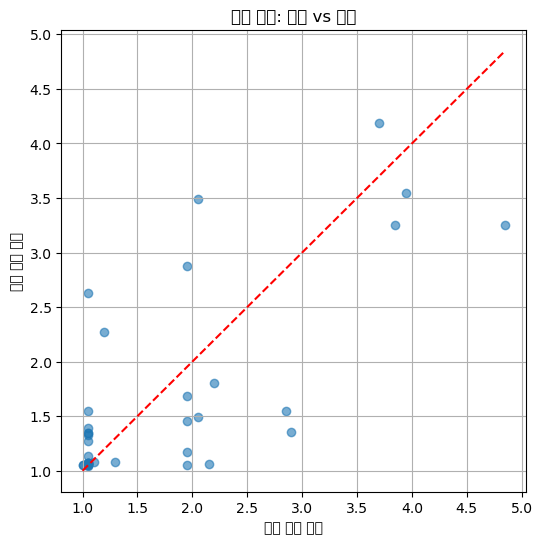

In [10]:
# 모델 학습
model_speed = RandomForestRegressor(random_state=42)
model_speed.fit(X_train, y_train_speed)

# 예측
pred_speed = model_speed.predict(X_val)

# 평가
mae_speed = mean_absolute_error(y_val_speed, pred_speed)
rmse_speed = np.sqrt(mean_squared_error(y_val_speed, pred_speed))
r2 = r2_score(y_val_speed, pred_speed)

print("voc_speed_sec_scr 예측")
print(f"MAE:  {mae_speed:.4f}")
print(f"RMSE: {rmse_speed:.4f}")
print("결정계수:", round(r2, 4))

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(y_val_speed, pred_speed, alpha=0.6)
plt.plot([y_val_speed.min(), y_val_speed.max()],
         [y_val_speed.min(), y_val_speed.max()], 'r--')
plt.xlabel("실제 속도 점수")
plt.ylabel("예측 속도 점수")
plt.title("속도 예측: 실제 vs 예측")
plt.grid(True)
plt.show()

In [17]:
speed_accuracy_within_1 = np.mean(np.abs(y_val_speed - pred_speed) <= 1.0)
print("±1점 이내 정확도:", round(speed_accuracy_within_1 * 100, 2), "%")

±1점 이내 정확도: 81.58 %


voc_quality_scr 예측
MAE:  0.3845
RMSE: 0.4932
결정계수: 0.2104


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

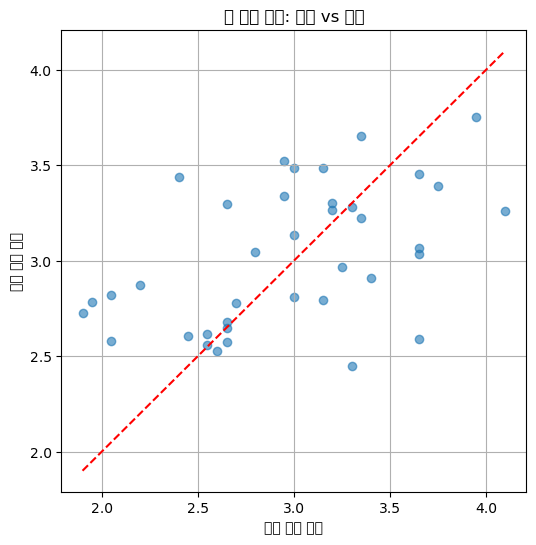

In [11]:
y_train_quality = df_train["voc_quality_scr"]
y_val_quality = df_val["voc_quality_scr"]

# 모델 학습
model_quality = RandomForestRegressor(random_state=42)
model_quality.fit(X_train, y_train_quality)

# 예측
pred_quality = model_quality.predict(X_val)

# 평가
mae_quality = mean_absolute_error(y_val_quality, pred_quality)
rmse_quality = np.sqrt(mean_squared_error(y_val_quality, pred_quality))
r2 = r2_score(y_val_quality, pred_quality)

print("voc_quality_scr 예측")
print(f"MAE:  {mae_quality:.4f}")
print(f"RMSE: {rmse_quality:.4f}")
print("결정계수:", round(r2, 4))

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(y_val_quality, pred_quality, alpha=0.6)
plt.plot([y_val_quality.min(), y_val_quality.max()],
         [y_val_quality.min(), y_val_quality.max()], 'r--')
plt.xlabel("실제 품질 점수")
plt.ylabel("예측 품질 점수")
plt.title("📈 품질 예측: 실제 vs 예측")
plt.grid(True)
plt.show()

In [18]:
quality_accuracy_within_1 = np.mean(np.abs(y_val_quality - pred_quality) <= 1.0)
print("±1점 이내 정확도:", round(quality_accuracy_within_1 * 100, 2), "%")

±1점 이내 정확도: 94.74 %


<Axes: title={'center': '피처 중요도 (voc_speed_sec_scr)'}>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54588 (\N{HANGUL SY

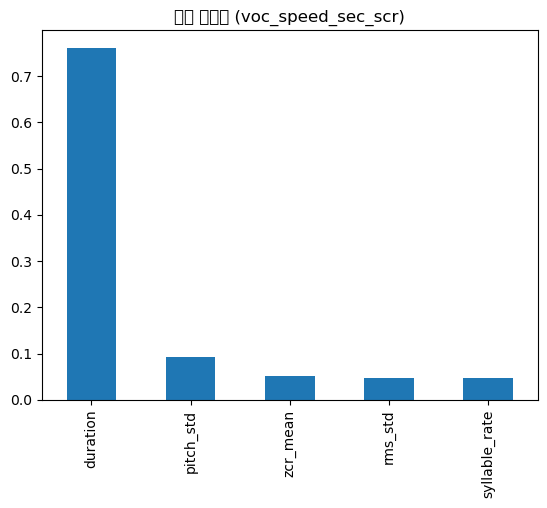

In [13]:
importance = pd.Series(model_speed.feature_importances_, index=feature_cols)
importance.sort_values(ascending=False).plot(kind="bar", title="피처 중요도 (voc_speed_sec_scr)")

<Axes: title={'center': '피처 중요도 (voc_quality_scr)'}>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54588 (\N{HANGUL SY

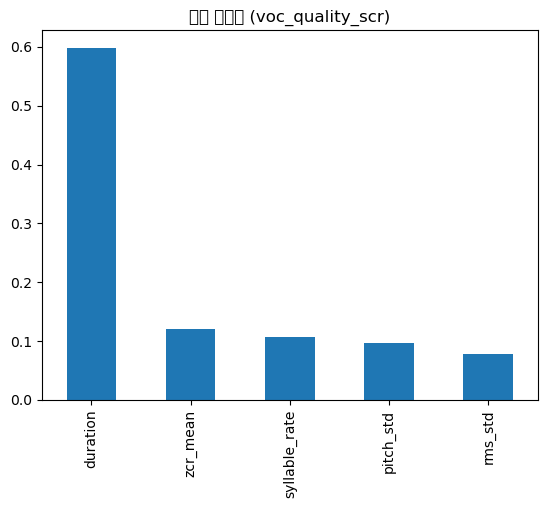

In [14]:
importance = pd.Series(model_quality.feature_importances_, index=feature_cols)
importance.sort_values(ascending=False).plot(kind="bar", title="피처 중요도 (voc_quality_scr)")

In [15]:
import joblib

joblib.dump(model_speed, "model_speed.pkl")
joblib.dump(model_quality, "model_quality.pkl")

['model_quality.pkl']